# ZJ Al2O3 Part1

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')

import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import scipy
from scipy import stats
from scipy.stats import norm

from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from pathlib import Path
from glob import glob
%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))
import Lorentzian

## create dataframe

In [2]:
filepath = glob("//samba.campuscluster.illinois.edu/illinois-flandes/Katsuya Shiratori/00_projects/datasets/Al2O3_dataset1/*.csv")
filename = [p.split('\\')[-1] for p in glob("//samba.campuscluster.illinois.edu/illinois-flandes/Katsuya Shiratori/00_projects/datasets/Al2O3_dataset1/*.csv")]

In [3]:
for i in tqdm(range(len(filepath))):
    # read the ith particle spctrum
    spectrum_df = pd.read_csv(filepath[i])
    
    # Lorentzian fitting
    fitting_range = np.linspace(min(spectrum_df['exp_ene']), max(spectrum_df['exp_ene']), len(spectrum_df['exp_ene']))
    max_int, e_res, linewidth = Lorentzian.lorentzian(spectrum_df['exp_ene'], spectrum_df['exp_dfs'])
    fitting = Lorentzian.func(fitting_range, max_int, e_res, linewidth)
    
    # particle geometry information
    filename_tmp = '_' + filename[i] 
    p = r'_(.*?)_'  # regular expression to get strings between _**_
    extracted_list = re.findall(p, filename_tmp)
    width = float(extracted_list[1])
    length = float(extracted_list[2])
    aspectratio = length / width
    volume = np.pi*(width**2)*length/4 - np.pi*(width**3)/12
    surface = np.pi * width * length
    
    particle_dict = {'exp_ene': list(spectrum_df['exp_ene']),
                 'exp_dfs': list(spectrum_df['exp_dfs']),
                 'fitting': list(fitting),
                 'imax': max_int,
                 'eres': e_res,
                 'linewidth': abs(linewidth),  # why is it negative?
                 'width': width,
                 'length': length,
                 'aspect_ratio': aspectratio,
                 'volume': volume,
                 'surface_area': surface
    }

    if i == 0:  # first row
        row = pd.DataFrame([particle_dict])
    else:  # add one row after another
        new_row = pd.DataFrame([particle_dict])
        exp_data = pd.concat([row, new_row], axis=0, ignore_index=True)
        row = exp_data

100%|██████████| 22/22 [00:01<00:00, 21.11it/s]


In [4]:
exp_data.head()

,exp_ene,exp_dfs,fitting,imax,eres,linewidth,width,length,aspect_ratio,volume,surface_area
0,"[3.19442480090624, 3.18785573983687, 3.1813143...","[0.0628966697562936, -0.0367280324681221, 0.03...","[0.020316555312092408, 0.020720729366267506, 0...",0.753496,1.645941,0.089823,21.3863,74.1387,3.466645,24071.346063,4981.160022
1,"[3.19442480090624, 3.18785573983687, 3.1813143...","[0.0585041731249723, 0.0559201326598771, 0.023...","[0.013728692838350444, 0.013949424611931936, 0...",0.902710,1.713078,0.083742,21.7862,82.1815,3.772181,27928.482419,5624.778472
2,"[3.19442480090624, 3.18785573983687, 3.1813143...","[0.0611797981318337, -0.126043510355307, -0.11...","[0.009528063735215388, 0.009661947175858622, 0...",0.843499,1.762634,0.082622,21.5302,85.3105,3.962364,28446.233517,5770.326989
3,"[3.19442480090624, 3.18785573983687, 3.1813143...","[0.0458309137775647, 0.0203669646788963, 0.050...","[0.0064548775635296955, 0.006531512993041401, ...",0.718233,1.833903,0.087184,21.6930,75.7568,3.492223,25326.969552,5162.869059
4,"[3.19442480090624, 3.18785573983687, 3.1813143...","[0.0540556961300742, 0.226357436739791, -0.023...","[0.01973909290455272, 0.020133515592107163, 0....",0.777121,1.645204,0.086873,21.0367,81.0359,3.852120,25728.573164,5355.560702


In [8]:
exp_data.to_csv('080624_Zhenyang_exp_al2o3_1.csv', index=False)

22.150004545454546 78.1096090909091
0.8998678508681006 5.793683940777899


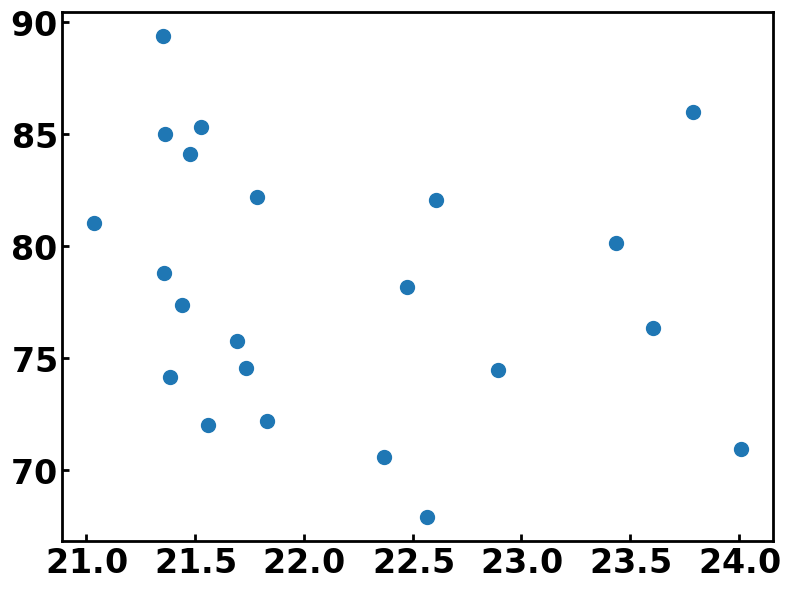

In [7]:
plt.scatter(exp_data['width'], exp_data['length'])
print(exp_data['width'].mean(), exp_data['length'].mean())
print(exp_data['width'].std(), exp_data['length'].std())